## Task 1: Import Libraries and Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib
import os

## Task 2: Load the Dataset

In [3]:
df = pd.read_csv('datafile.csv')
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


## Task 3: Remove Duplicate Values

In [4]:
print("Duplicate Values: ",df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.head()

Duplicate Values:  17


,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,02-10-2012 09:00
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,02-10-2012 10:00
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 11:00
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,02-10-2012 12:00
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,02-10-2012 13:00


## Task 4: Create a Histogram of Traffic Volume

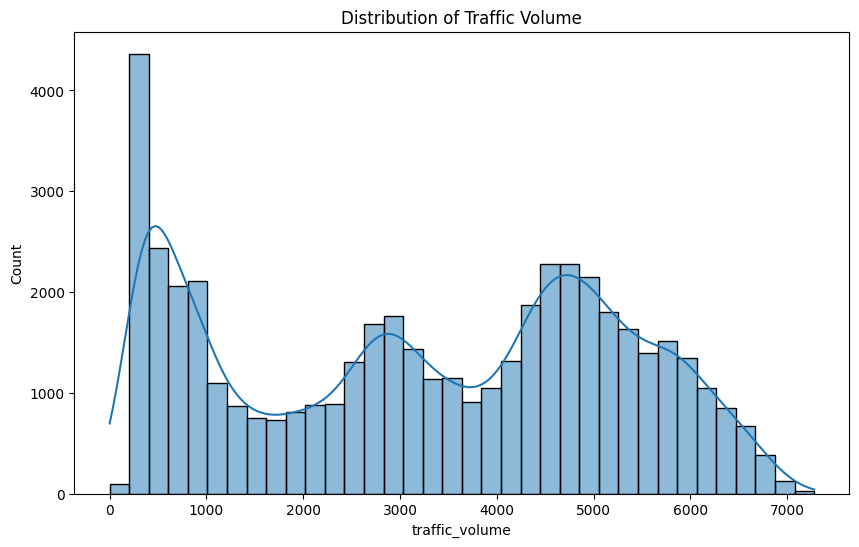

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(df['traffic_volume'], kde=True)
plt.title('Distribution of Traffic Volume')
plt.show()

## Task 5: Get the Date and Time

In [7]:
df['date_time']=pd.to_datetime(df['date_time'], format='%d-%m-%Y %H:%M')
df['day'] = df['date_time'].dt.day_name()
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year
df['hour'] = df['date_time'].dt.hour
df.drop('date_time',axis=1,inplace = True)
df.head()

,traffic_volume,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,day,month,year,hour
0,5545,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,Tuesday,10,2012,9
1,4516,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,Tuesday,10,2012,10
2,4767,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,Tuesday,10,2012,11
3,5026,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,Tuesday,10,2012,12
4,4918,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,Tuesday,10,2012,13


## Task 6: Convert Categorical Columns to Numerical

In [8]:
df = pd.get_dummies(df, columns=list(set(df.columns) - set(df._get_numeric_data().columns)))

## Task 7: Create Input and Output Parameters

In [9]:
x = df.drop('traffic_volume',axis = 1)
y = df['traffic_volume']

## Task 8: Split the Training and Testing Data

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85,shuffle = True,random_state=42)

## Task 9: Build the Models

In [11]:
models = {
    'Linear Regression':LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest' : RandomForestRegressor()
}

## Task 10: Train the Models

In [12]:
for name,model in models.items():
    model.fit(x_train,y_train)

## Task 11: Evaluate the Models

In [13]:
data = {}
model_list = []
train_r2_score = []
test_r2_score = []
train_mean_squared_error = []
test_mean_squared_error = []
for model_name, model in models.items():
    pred_train = model.predict(x_train)
    pred_test = model.predict(x_test)
    model_list.append(model_name)
    train_r2_score.append(r2_score(y_train,pred_train))
    test_r2_score.append(r2_score(y_test,pred_test))
    train_mean_squared_error.append(mean_squared_error(y_train,pred_train))
    test_mean_squared_error.append(mean_squared_error(y_test,pred_test))

## Task 12: Save the Models

In [14]:
for model_name, model in models.items():
	file_path = os.path.join(".", f"{model_name}.pkl")
	joblib.dump(model, file_path)
	print(f"{model_name} model saved to {file_path}")

Linear Regression model saved to .\Linear Regression.pkl
Decision Tree model saved to .\Decision Tree.pkl
Random Forest model saved to .\Random Forest.pkl


## Task 13: Load and Use the Models

In [15]:
loaded_models = []
for i in range(3):
    loaded_models.append(joblib.load(model_list[i] + ".pkl"))
    print(f"Model {model_list[i]} loaded successfully.")
sample_data = x_test.iloc[:10]
y_test = y_test.iloc[:10]
for model_name, model in zip(model_list, loaded_models):
    prediction = model.predict(sample_data)
    mse = mean_squared_error(y_test, prediction)
    print(f"{model_name} MSE: {mse}")

Model Linear Regression loaded successfully.
Model Decision Tree loaded successfully.
Model Random Forest loaded successfully.
Linear Regression MSE: 2155274.7773433877
Decision Tree MSE: 169348.7
Random Forest MSE: 238453.69040999986
